## Library Import

In [1]:
%matplotlib inline
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

## Helper function

In [2]:
#helper function
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## load Dataset

In [3]:
#load the csv file
# df=pd.read_csv('../input/Iris.csv')
iris = datasets.load_iris()

#Replace Species type with numbers
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out train, test dataset
array = iris.data
X = iris.data[:, [0, 1]]
Y = iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## Decision Region of Naive Bayes


Class names
['setosa' 'versicolor' 'virginica']


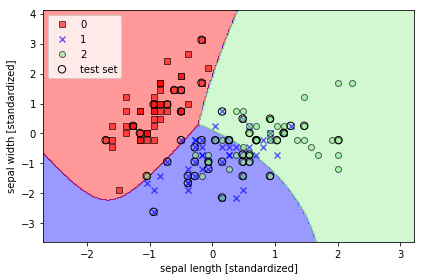

In [4]:
#Initialize Gaussian Naive Bayes
nb_clf = GaussianNB()

#Fitting the training set
nb_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=nb_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nClass names")
print(iris.target_names)
plt.show()

## Compare Naive Bayes with KNN


Class names
['setosa' 'versicolor' 'virginica']


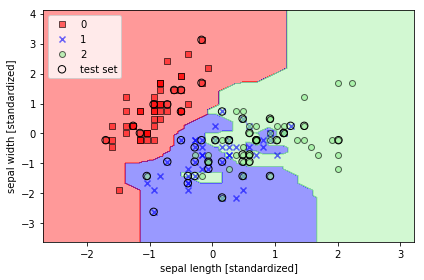

In [5]:
#Initialize KNN
knn_clf = KNeighborsClassifier(n_neighbors=1, p=1, metric='minkowski')

#Fitting the training set
knn_clf.fit(X_train_std, y_train) 

plot_decision_regions(X_combined_std, y_combined, classifier=knn_clf, test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
print("\nClass names")
print(iris.target_names)
plt.show()

## Naive Bayes Classifier Evaluation & Confusion Matrix

In [6]:
nb_y_pred = nb_clf.predict(X_test_std)

print("Classification Report")
print(classification_report(y_test, nb_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, nb_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       0.91      1.00      0.95        21
 versicolor       0.62      0.70      0.66        30
  virginica       0.56      0.42      0.48        24

avg / total       0.68      0.69      0.68        75


 Accuracy
0.693333333333


Confusion matrix, without normalization
[[21  0  0]
 [ 1 21  8]
 [ 1 13 10]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.03  0.7   0.27]
 [ 0.04  0.54  0.42]]


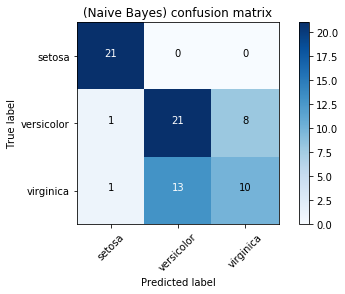

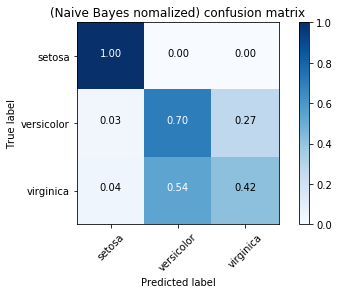

In [7]:
# Compute confusion matrix
nb_cnf_matrix = confusion_matrix(y_test, nb_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cnf_matrix, classes=iris.target_names,
                      title='(Naive Bayes) confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(nb_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Naive Bayes nomalized) confusion matrix')

plt.show()

## KNN Classifier Evaluation & Confusion Matrix

In [8]:
knn_y_pred = knn_clf.predict(X_test_std)

print("Classification Report")
print(classification_report(y_test, knn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(y_test, knn_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.64      0.47      0.54        30
  virginica       0.50      0.67      0.57        24

avg / total       0.69      0.68      0.68        75


 Accuracy
0.68


Confusion matrix, without normalization
[[21  0  0]
 [ 0 14 16]
 [ 0  8 16]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.47  0.53]
 [ 0.    0.33  0.67]]


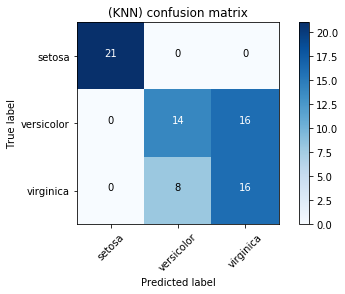

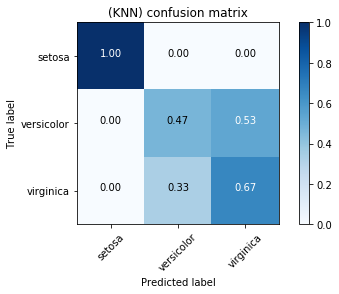

In [9]:
# Compute confusion matrix
knn_cnf_matrix = confusion_matrix(y_test, knn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn_cnf_matrix, classes=iris.target_names,
                      title='(KNN) confusion matrix')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(knn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(KNN) confusion matrix')

plt.show()

## Naive Bayes Classification using Total Features

In [10]:
#load the csv file
# df=pd.read_csv('../input/Iris.csv')
iris = datasets.load_iris()

#Replace Species type with numbers
# df.Species.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [1, 2, 3], inplace=True)

# Split-out train, test dataset
array = iris.data
full_X = iris.data
Y = iris.target

full_X_train, full_X_test, full_y_train, full_y_test = model_selection.train_test_split(full_X, Y, test_size=0.5, random_state=0)

sc = StandardScaler()
sc.fit(full_X_train)
full_X_train_std = sc.transform(full_X_train)
full_X_test_std = sc.transform(full_X_test)
full_X_combined_std = np.vstack((full_X_train_std, full_X_test_std))
full_y_combined = np.hstack((full_y_train, full_y_test))

In [11]:
#Initialize Gaussian Naive Bayes
full_nb_clf = GaussianNB()

#Fitting the training set
full_nb_clf.fit(full_X_train_std, full_y_train) 

GaussianNB(priors=None)

In [12]:
full_nb_y_pred = full_nb_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_nb_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_nb_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.88      1.00      0.94        30
  virginica       1.00      0.83      0.91        24

avg / total       0.95      0.95      0.95        75


 Accuracy
0.946666666667


Confusion matrix, without normalization
[[21  0  0]
 [ 0 30  0]
 [ 0  4 20]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    1.    0.  ]
 [ 0.    0.17  0.83]]


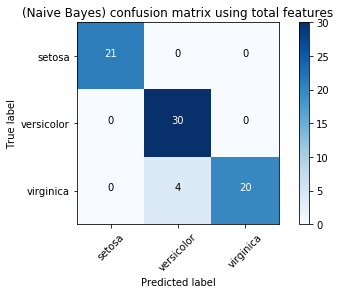

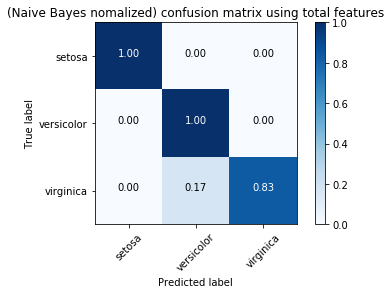

In [13]:
# Compute confusion matrix
full_nb_cnf_matrix = confusion_matrix(full_y_test, full_nb_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nb_cnf_matrix, classes=iris.target_names,
                      title='(Naive Bayes) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_nb_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(Naive Bayes nomalized) confusion matrix using total features')

plt.show()

## KNN Classification Using Total Features

In [14]:
#Initialize Gaussian Naive Bayes
full_knn_clf = KNeighborsClassifier(n_neighbors=1, p=1, metric='minkowski')

#Fitting the training set
full_knn_clf.fit(full_X_train_std, full_y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [15]:
full_knn_y_pred = full_knn_clf.predict(full_X_test_std)

print("Classification Report")
print(classification_report(full_y_test, full_knn_y_pred, target_names=iris.target_names))

print("\n Accuracy")
print(accuracy_score(full_y_test, full_knn_y_pred))

Classification Report
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.85      0.97      0.91        30
  virginica       0.95      0.79      0.86        24

avg / total       0.93      0.92      0.92        75


 Accuracy
0.92


Confusion matrix, without normalization
[[21  0  0]
 [ 0 29  1]
 [ 0  5 19]]
Normalized confusion matrix
[[ 1.    0.    0.  ]
 [ 0.    0.97  0.03]
 [ 0.    0.21  0.79]]


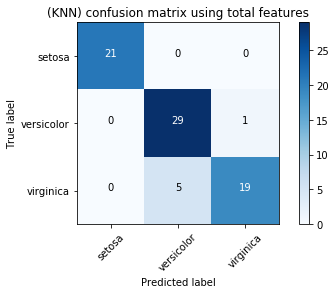

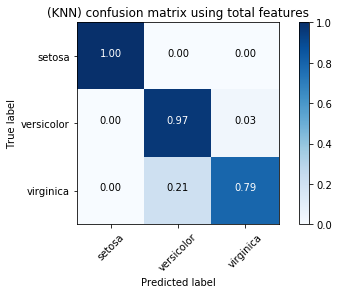

In [16]:
# Compute confusion matrix
full_knn_cnf_matrix = confusion_matrix(full_y_test, full_knn_y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_knn_cnf_matrix, classes=iris.target_names,
                      title='(KNN) confusion matrix using total features')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(full_knn_cnf_matrix, classes=iris.target_names, normalize=True,
                      title='(KNN) confusion matrix using total features')

plt.show()